In [42]:
# imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

plt.style.use("dark_background")
pd.pandas.set_option("display.max_columns", None)

### Load the datasets

In [43]:
# Read in features
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.333333,0.666667,0.490408,0.372646,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.333333,0.0,1.0,0.75,0.2,0.444444,0.500,0.485294,0.950820,0.0,0.0,0.2,0.4,0.333333,0.000,0.333333,0.50,0.50,0.333333,0.666667,0.000000,0.4,0.065202,0.6,1.0,0.153682,0.125696,1.0,0.5,1.0,1.000000,0.402688,0.197579,0.0,0.500838,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.8,0.75,0.616822,0.0,0.25,0.169252,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.666667,0.328426,0.276953,1.0,1.0,0.333333,0.000000,1.0,0.25,0.0,0.095238,0.4,1.0,0.75,0.6,0.333333,0.750,0.610294,0.803279,0.0,0.0,0.3,0.2,0.333333,0.000,0.333333,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.188356,0.072013,1.0,0.5,1.0,0.666667,0.361859,0.000000,0.0,0.338257,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.166667,1.0,0.000000,0.0,0.75,0.258532,0.0,0.00,0.000000,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,1.0
2,0.583333,0.666667,0.388581,0.317031,1.0,1.0,0.000000,1.000000,1.0,0.25,0.5,0.714286,0.4,1.0,0.75,1.0,0.666667,0.625,0.566176,0.147541,0.0,0.0,0.5,0.4,0.333333,0.000,0.333333,0.25,0.25,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.332192,0.127005,1.0,0.5,1.0,1.000000,0.353938,0.315254,0.0,0.531832,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.8,0.75,0.719626,0.5,0.25,0.190409,0.5,0.5,0.5,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.666667,0.388581,0.348053,1.0,1.0,0.000000,0.000000,1.0,0.25,0.0,0.285714,0.4,1.0,0.75,0.6,0.111111,0.500,0.654412,0.983607,0.0,0.0,0.3,0.2,0.333333,0.000,0.333333,0.50,0.50,0.333333,0.333333,0.000000,0.4,0.051382,0.0,0.0,0.000000,0.047463,1.0,0.5,0.0,0.333333,0.102585,0.000000,0.0,0.095894,0.000000,0.0,0.333333,0.0,0.125,0.333333,0.000000,0.083333,1.0,0.000000,0.0,0.25,0.738318,0.0,0.25,0.173484,0.5,0.5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.000000,0.666667,0.75,0.0,0.0,0.0
4,1.000000,0.666667,0.476078,0.374734,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.952381,0.4,1.0,0.75,1.0,0.777778,0.500,0.022059,0.049180,0.0,0.0,0.9,0.9,0.666667,0.215,0.666667,0.50,1.00,1.000000,0.666667,0.666667,0.0,0.000000,0.0,0.0,0.489298,0.187070,1.0,1.0,1.0,1.000000,0.465575,0.644068,0.0,0.708224,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.8,1.00,0.028037,0.5,0.75,0.600846,0.5,0.5,1.0,0.224037,0.300797,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.818182,0.666667,0.75,0.0,0.0,0.0


In [44]:
# read in targets
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,SalePrice
0,11.561716
1,11.356272
2,11.911702
3,11.002100
4,12.666657


In [45]:
# read in selected features
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

print(features)

['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'BsmtExposure', 'BsmtFinType1', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars']


In [46]:
# reduce the datasets
X_train = X_train[features]
X_test = X_test[features]

### Regularized linear regression Lasso

In [47]:
# create and train the model
lin_model = Lasso(alpha=0.0001, random_state=87)
lin_model.fit(X_train, y_train)

# get predictions for train set
pred = lin_model.predict(X_train)

# evaluate train set predictions
print(
    f"train mse: {int(mean_squared_error(np.exp(y_train), np.exp(pred)))}"
)
print(
    f"train rmse: {int(root_mean_squared_error(np.exp(y_train), np.exp(pred)))}"
)
print(
    f"train r2: {r2_score(np.exp(y_train), np.exp(pred))}"
)

train mse: 937115880
train rmse: 30612
train r2: 0.8478484987889006


In [56]:
# make predictions on test set
pred = lin_model.predict(X_test)

# evaluate train set predictions
print(
    f"test mse: {int(mean_squared_error(np.exp(y_test), np.exp(pred)))}"
)
print(
    f"test rmse: {int(root_mean_squared_error(np.exp(y_test), np.exp(pred)))}"
)
print(
    f"test r2: {r2_score(np.exp(y_test), np.exp(pred))}"
)

print(f"Median house price: {int(np.exp(y_train['SalePrice']).median())}")

test mse: 860578068
test rmse: 29335
test r2: 0.8866037762523168
Median house price: 163000


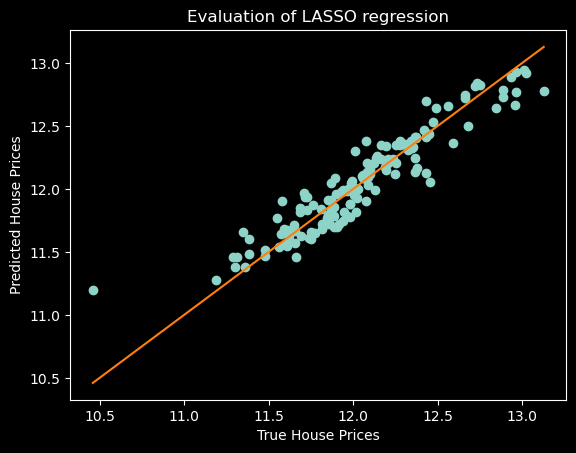

In [64]:
# compare predictions against actual prices
_, ax = plt.subplots()
ax.scatter(y_test, lin_model.predict(X_test))
ax.plot(np.linspace(y_test.min(), y_test.max()),
         np.linspace(y_test.min(), y_test.max()),
         color='#ff7f0e')
plt.xlabel("True House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Evaluation of LASSO regression")
plt.show()

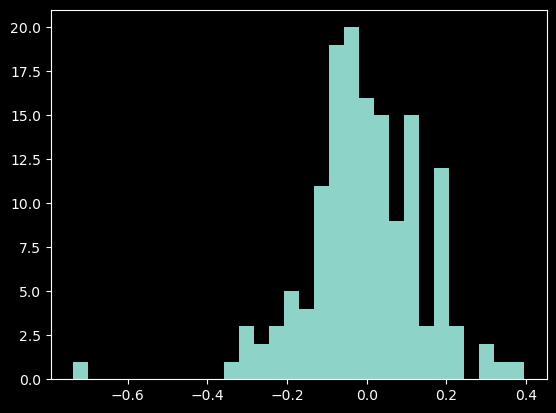

In [68]:
# residual analysis
residuals = y_test['SalePrice'] - pred

plt.figure()
plt.hist(residuals, bins=30)
plt.show()